### 1. Load and Explore Your Data

In [838]:
##Import Relevant Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [839]:
##Import dataset 
df = pd.read_csv(r'C:\Users\David\PHASE 3 PROJECT\PHASE-3-PROJECT\bigml_59c28831336c6604c800002a.csv')  
print(df)

     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              

### 2.Exploratory data analysis(EDA)

In [840]:
# view dimensions of dataset
df.shape

(3333, 21)

There are 3333 instances and 21 variables in the data set.

In [841]:
# preview the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


###  Display basic information

In [842]:
# Get the data types of all columns
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [843]:
#get the column names
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [845]:
#summary of the statistics of the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [846]:
#find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


There are 17 numerical variables in the dataset

In [847]:
#find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [848]:
# view the categorical variables

df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


### Preprocess Data

a) Handling Missing Values

In [849]:
# check missing values in categorical variables
df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

Summary of categorical variables

There are 4 categorical variables. These are given by state,international plan,voice mail plan and phone number.

There are two binary categorical variables - international plan and voice mail plan.

churn is the target variable.

There are no missing values in categorical variable.

#### b). Number of labels: cardinality

High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [850]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

state  contains  51  labels
phone number  contains  3333  labels
international plan  contains  2  labels
voice mail plan  contains  2  labels


We can see that there is a phone number variable which needs to be preprocessed. If a phone number field has the highest cardinality (i.e., each phone number is unique or nearly unique), it presents challenges for preprocessing, especially for machine learning models where high cardinality features can lead to inefficiencies and overfitting

All the other variables contain relatively smaller number of variables.
I will drop the phone number since its usually not used directly in analysis, as it’s a unique identifier rather than a predictive feature.

In [851]:
# Drop the 'phone number' column from the DataFrame
df = df.drop(columns=['phone number'])

#### c) Encoding Categorical Variables

Convert categorical variables into numerical format using one-hot encoding:

In [852]:
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['state', 'area code', 'international plan', 'voice mail plan'])


In [853]:
# scale numeric features
scaler = StandardScaler()
df[['account length']] = scaler.fit_transform(df[['account length']])

print(df)

     state  account length  area code international plan voice mail plan  \
0       KS        0.676489        415                 no             yes   
1       OH        0.149065        415                 no             yes   
2       NJ        0.902529        415                 no              no   
3       OH       -0.428590        408                yes              no   
4       OK       -0.654629        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ        2.283878        415                 no             yes   
3329    WV       -0.830437        415                 no              no   
3330    RI       -1.835055        510                 no              no   
3331    CT        2.082955        510                yes              no   
3332    TN       -0.679745        415                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                   

c. Separate Features and Target Variable

In [854]:
# Define features and target variable
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']


d. Normalize/Scale Numeric Features 

Scaling numeric features can improve the performance of some models:

In [855]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                    'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
X[numeric_features] = scaler.fit_transform(X[numeric_features])


### 3. Split the Data into Training and Test Sets

In [856]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [857]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 73), (667, 73))

In [858]:
#verify data types of all columns
print(df.dtypes)  

state                      object
account length            float64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


### 4. Choose and Train a Model

I will use the logistic model

In [859]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Ensure y_test and y_pred have the same length
print(len(y_test))  # Should be same as len(y_pred)


667


In [860]:
# instantiate the model
model = LogisticRegression(solver='liblinear', random_state=0)


In [861]:
# fit the model
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [862]:
# Create DataFrame for the confusion matrix
cm_matrix = pd.DataFrame(
    data=cm,
    columns=['Actual Negative: 0', 'Actual Positive: 1'],
    index=['Predict Negative: 0', 'Predict Positive: 1']
)

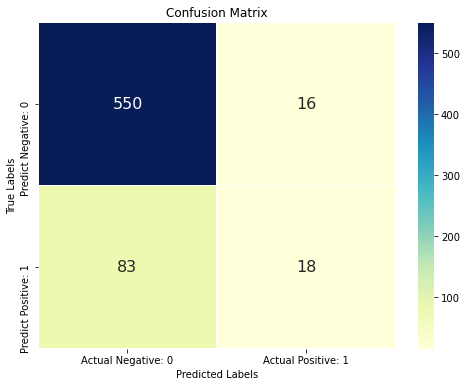

In [863]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu',
            cbar=True, annot_kws={"size": 16}, linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 4b. Classification metrices

##### classification report

In [865]:
#print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.53      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.70      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



#### b) Compare the train-set and test-set accuracy

In [866]:
y_pred_train = model.predict(X_train)

y_pred_train

array([False, False,  True, ..., False, False, False])

In [869]:
#print classification accuracy
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8706


In [868]:
#Check for overfitting and underfitting
#print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8706
Test set score: 0.8516


The training-set accuracy score is 0.8706 while the test-set accuracy to be 0.8516. These two values are quite comparable. So, there is no question of overfitting.

### 4c). Adjusting the threshold level

In [875]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.85964513, 0.14035487],
       [0.99078387, 0.00921613],
       [0.97637945, 0.02362055],
       [0.88081324, 0.11918676],
       [0.96806606, 0.03193394],
       [0.98670224, 0.01329776],
       [0.96243486, 0.03756514],
       [0.9840752 , 0.0159248 ],
       [0.68645213, 0.31354787],
       [0.98060017, 0.01939983]])

Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that customer will churn.

Class 1 - predicted probability that customer will not churn.

Classification threshold level

There is a classification threshold level of 0.5.

Class 1 - probability of churn is predicted if probability > 0.5.

Class 0 - probability of no churn is predicted if probability < 0.5.



In [876]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - customer will not churn (0)', 'Prob of - customer will churn (1)'])

y_pred_prob_df

,Prob of - customer will not churn (0),Prob of - customer will churn (1)
0,0.859645,0.140355
1,0.990784,0.009216
2,0.976379,0.023621
3,0.880813,0.119187
4,0.968066,0.031934
5,0.986702,0.013298
6,0.962435,0.037565
7,0.984075,0.015925
8,0.686452,0.313548
9,0.980600,0.019400


In [877]:
# print the first 5 predicted probabilities for class 1 - Probability of churn

model.predict_proba(X_test)[0:5, 1]

array([0.14035487, 0.00921613, 0.02362055, 0.11918676, 0.03193394])

In [878]:
# store the predicted probabilities for class 1 - Probability of churn

y_pred1 = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'total intl charge')

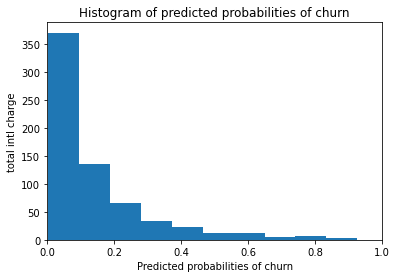

In [883]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 10


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of churn')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of churn')
plt.ylabel('total intl charge')


### Observations

There are small number of observations with probability > 0.5.

So, these small number of observations predict that customers will churn.

Majority of observations predict that customers will not churn.

### 5. Analysis of the Results
Accuracy: The proportion of correctly predicted instances. An accuracy of approximately 85.2% means that our model correctly classified about 85.2% of all instances in our dataset.

Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.
True Negatives (TN): 551 (Correctly predicted as False)
False Positives (FP): 15 (Incorrectly predicted as True)
False Negatives (FN): 83 (Incorrectly predicted as False)
True Positives (TP): 18 (Correctly predicted as True)

Classification Report: Provides precision, recall, and F1-score for each class.

Precision: Measures how many of the predicted positives are actually positive.
False Class Precision: 0.87 - When the model predicts False, it is correct 87% of the time.
True Class Precision: 0.53 - When the model predicts True, it is correct 53% of the time.

Recall (Sensitivity): Measures how many actual positives are correctly predicted by the model.
False Class Recall: 0.97 - Of all actual False instances, 97% were correctly identified.
True Class Recall: 0.18 - Of all actual True instances, only 18% were correctly identified.

F1-Score: The harmonic mean of precision and recall, balancing the two metrics.
False Class F1-Score: 0.92 - A balance between precision and recall for the False class.
True Class F1-Score: 0.27 - A balance between precision and recall for the True class.

Support: The number of actual occurrences of each class in the dataset.
False Class Support: 566
True Class Support: 101

Macro Average: Averages precision, recall, and F1-score across classes without considering the class imbalance.

Macro Average Precision: 0.70
Macro Average Recall: 0.57
Macro Average F1-Score: 0.59
Weighted Average: Averages precision, recall, and F1-score across classes, weighted by the number of instances in each class.

Weighted Average Precision: 0.82
Weighted Average Recall: 0.85
Weighted Average F1-Score: 0.82

### 6. Interpretation of the Results

Overall Accuracy: 85.2% indicates the model performs well overall but doesn't tell the whole story, especially in the presence of class imbalance.

Confusion Matrix Analysis:

The model has high accuracy in predicting the False class (high precision and recall for False).
The model struggles with the True class, with a low recall of 18%. This means it misses many True instances, leading to a low F1-score of 0.27 for True.
Precision and Recall Trade-Off:

High Precision for False Class: Indicates that when the model predicts False, it is mostly correct.
Low Recall for True Class: Indicates that many True instances are missed. This might be due to an imbalanced dataset or the model’s current thresholds.

Macro vs. Weighted Average:

Macro Average: Provides an unweighted mean, giving equal importance to each class regardless of their support.
Weighted Average: Takes into account the number of instances per class, giving more weight to larger classes.

### 7. Summary


Model Strengths: Good at identifying False cases (high precision and recall).
Model Weaknesses: Poor at identifying True cases (low recall and F1-score for True). This could be due to class imbalance or insufficient feature representation for the True class.

### 8. Actions to Consider

I will consider the actions below.

1. Feature Engineering: Explore if additional features or different features could help improve the model's ability to identify True instances.

2. Model Tuning: Experiment with different algorithms or hyperparameters to see if they provide better performance for the True class.

### 9. MODEL TUNING

I will experiment with ROC AUC curve and cross validate with decison tree to find out if they provide a better perfomance for the True  class.

### ROC-AUC

 In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
 
 So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [885]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8253


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether customer will churn or not.

In [886]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7977


### 10.DECISION TREE CROSS VALIDATION